In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import nltk
import math

In [2]:
def conv_to_char(n):
    s = list(n)
    st = ""
    for i in s:
        st += chr(i)
    return st

In [5]:
def features_of_images_train_val(location_folder):
    
    list_of_files = os.listdir(location_folder)
    
    full_file_path = []
    for i in list_of_files:
        full_file_path.append(location_folder+i)

    id = []
    cls = []
    image = []

    for i in full_file_path:
        raw_img = tf.data.TFRecordDataset(i)
        image_description = {
            "id" : tf.io.FixedLenFeature([],tf.string),
            "class": tf.io.FixedLenFeature([],tf.int64),
            "image": tf.io.FixedLenFeature([],tf.string)
        }
        y = lambda x: tf.io.parse_single_example(x,image_description)
        img = raw_img.map(y)

        begin = i.rindex("-")+1
        end = i.index(".tfrec")
        num = int(i[begin:end])

        for dr in img.take(num):
            id.append(conv_to_char(dr["id"].numpy()))
            cls.append(int(dr["class"].numpy()))
            image.append(tf.io.decode_image(dr["image"]).numpy())
    
    id = np.array(id)
    cls = np.array(cls)
    image = np.array(image)
    
    return id,cls,image

In [6]:
def features_of_images_test(location_folder):

    list_of_files = os.listdir(location_folder)

    full_file_path = []
    for i in list_of_files:
        full_file_path.append(location_folder+i)

    id = []
    image = []

    for i in full_file_path:
        raw_img = tf.data.TFRecordDataset(i)
        image_description = {
            "id" : tf.io.FixedLenFeature([],tf.string),
            "image": tf.io.FixedLenFeature([],tf.string)
        }
        y = lambda x: tf.io.parse_single_example(x,image_description)
        img = raw_img.map(y)

        begin = i.rindex("-")+1
        end = i.index(".tfrec")
        num = int(i[begin:end])

        for dr in img.take(num):
            id.append(conv_to_char(dr["id"].numpy()))
            image.append(tf.io.decode_image(dr["image"]).numpy())

    id = np.array(id)
    image = np.array(image)
    
    return id,image

In [7]:
location_folder_train_192 = "/Users/amith/Documents/GitHub/kaggle/Petals to the Metal - Flower Classification on TPU/tpu-getting-started/tfrecords-jpeg-192x192/train/"

location_folder_train_224 = "/Users/amith/Documents/GitHub/kaggle/Petals to the Metal - Flower Classification on TPU/tpu-getting-started/tfrecords-jpeg-224x224/train/"

location_folder_train_331 = "/Users/amith/Documents/GitHub/kaggle/Petals to the Metal - Flower Classification on TPU/tpu-getting-started/tfrecords-jpeg-331x331/train/"

location_folder_train_512 = "/Users/amith/Documents/GitHub/kaggle/Petals to the Metal - Flower Classification on TPU/tpu-getting-started/tfrecords-jpeg-512x512/train/"

In [8]:
location_folder_val_192 = "/Users/amith/Documents/GitHub/kaggle/Petals to the Metal - Flower Classification on TPU/tpu-getting-started/tfrecords-jpeg-192x192/val/"

location_folder_val_224 = "/Users/amith/Documents/GitHub/kaggle/Petals to the Metal - Flower Classification on TPU/tpu-getting-started/tfrecords-jpeg-224x224/val/"

location_folder_val_331 = "/Users/amith/Documents/GitHub/kaggle/Petals to the Metal - Flower Classification on TPU/tpu-getting-started/tfrecords-jpeg-331x331/val/"

location_folder_val_512 = "/Users/amith/Documents/GitHub/kaggle/Petals to the Metal - Flower Classification on TPU/tpu-getting-started/tfrecords-jpeg-512x512/val/"

In [9]:
location_folder_test_192 = "/Users/amith/Documents/GitHub/kaggle/Petals to the Metal - Flower Classification on TPU/tpu-getting-started/tfrecords-jpeg-192x192/test/"

location_folder_test_224 = "/Users/amith/Documents/GitHub/kaggle/Petals to the Metal - Flower Classification on TPU/tpu-getting-started/tfrecords-jpeg-224x224/test/"

location_folder_test_331 = "/Users/amith/Documents/GitHub/kaggle/Petals to the Metal - Flower Classification on TPU/tpu-getting-started/tfrecords-jpeg-331x331/test/"

location_folder_test_512 = "/Users/amith/Documents/GitHub/kaggle/Petals to the Metal - Flower Classification on TPU/tpu-getting-started/tfrecords-jpeg-512x512/test/"

### Trainign Dataset

In [10]:
id_train_192,cls_train_192,image_train_192 = features_of_images_train_val(location_folder_train_192)

In [11]:
id_train_224,cls_train_224,image_train_224 = features_of_images_train_val(location_folder_train_224)

In [12]:
id_train_331,cls_train_331,image_train_331 = features_of_images_train_val(location_folder_train_331)

In [13]:
id_train_512,cls_train_512,image_train_512 = features_of_images_train_val(location_folder_train_512)

### Validation Dataset

In [14]:
id_val_192,cls_val_192,image_val_192 = features_of_images_train_val(location_folder_val_192)

In [15]:
id_val_224,cls_val_224,image_val_224 = features_of_images_train_val(location_folder_val_224)

In [16]:
id_val_331,cls_val_331,image_val_331 = features_of_images_train_val(location_folder_val_331)

In [17]:
id_val_512,cls_val_512,image_val_512 = features_of_images_train_val(location_folder_val_512)

### Testing Dataset

In [18]:
id_test_192,image_test_192 = features_of_images_test(location_folder_test_192)

In [19]:
id_test_224,image_test_224 = features_of_images_test(location_folder_test_224)

In [20]:
id_test_331,image_test_331 = features_of_images_test(location_folder_test_331)

In [21]:
id_test_512,image_test_512 = features_of_images_test(location_folder_test_512)

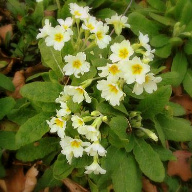

In [23]:
tf.keras.utils.array_to_img(image_test_192[0])

In [40]:
image_test_192[0]

array([[[ 45,  42,   7],
        [ 59,  56,  21],
        [ 55,  51,  16],
        ...,
        [ 80, 111,  35],
        [ 65,  99,  22],
        [ 56,  93,  13]],

       [[ 46,  43,  10],
        [ 53,  50,  15],
        [ 48,  45,  12],
        ...,
        [ 84, 115,  37],
        [ 70, 103,  24],
        [ 58,  96,  13]],

       [[ 33,  30,   0],
        [ 37,  37,   3],
        [ 41,  38,   7],
        ...,
        [ 88, 120,  37],
        [ 77, 111,  27],
        [ 66, 102,  15]],

       ...,

       [[ 36,  19,   3],
        [ 43,  20,   4],
        [ 56,  28,   6],
        ...,
        [ 42,  41,  13],
        [ 46,  42,  17],
        [ 46,  42,  17]],

       [[ 38,  23,   4],
        [ 39,  20,   3],
        [ 50,  23,   4],
        ...,
        [ 43,  42,  14],
        [ 44,  40,  15],
        [ 45,  41,  16]],

       [[ 33,  20,   1],
        [ 40,  21,   4],
        [ 49,  23,   6],
        ...,
        [ 40,  39,  11],
        [ 38,  34,   9],
        [ 37,  33,   8]]

In [ ]:
g = tf.image.resize(image_test_192,[512,512])